<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_lineplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

###라이브러리 로드하기

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import set_matplotlib_formats

###그래프 스타일 및 선명한 폰트 설정

In [3]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

### [Line plot - 선 그래프(나무위키)](https://namu.wiki/w/%EC%84%A0%20%EA%B7%B8%EB%9E%98%ED%94%84)

- 수량을 점으로 표시하고 그 점을 선으로 이어 그린 그래프
- 시간에 따라 뭔가가 지속적으로 변화하는 것을 기록할 때 굉장히 유용
- 연속적 자료를 다루거나 통시적 자료를 다룰 경우 주로 사용

###lineplot 실습에 사용할 데이터
- flights
- fmri
- dots

#### flights 데이터

In [5]:
#데이터 로드하기
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
#passengers는 승객수를 나타내는데, 104~ 622명 평균은 280명, 중앙값은 265명 
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [8]:
#year column은 1949년~1960년을 나타내고 있다.
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [9]:
#month column은 1월 부터 12월
flights['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

####그래프 그리기

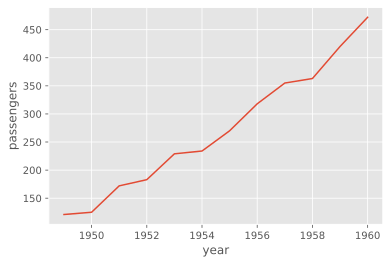

In [14]:
#flights[flights['month'] == 'May']
may_flights = flights.query("month == 'May'")
lineplot = sns.lineplot(data=may_flights, x='year',y='passengers')

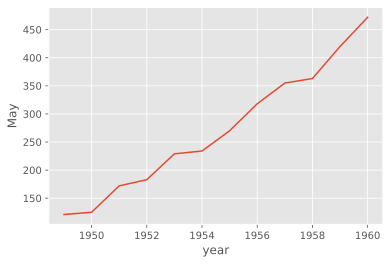

In [41]:
#flights_wide = flights.pivot_table(index='year',columns='month',values='passengers')

#pd.pivot을 사용하기
flights_wide = flights.pivot(index="year",columns = "month",values='passengers')

#위에서 지정하였던 pivot() 함수안에
#index값이 자동으로 x값, y값은 values로 지정
lineplot = sns.lineplot(data=flights_wide['May'])

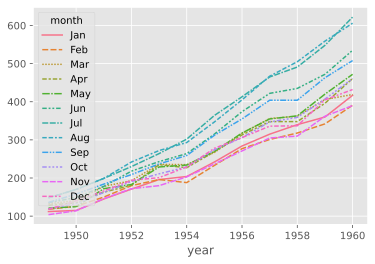

In [42]:
#data에서 column을 지정하지 않으면 자동으로 hue 값으로 적용

lineplot = sns.lineplot(data=flights_wide)

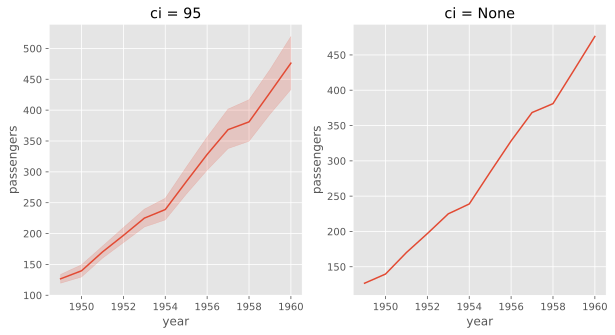

In [56]:
#기본값으로 lineplot을 그리면 평균 및 신뢰구간(95)가 기본으로 적용됨
#ci옵션으로 제어 가능
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set(title='ci = 95')
sns.lineplot(data=flights, x='year', y='passengers',ci=95,ax=ax1)
ax2.set(title='ci = None')
sns.lineplot(data=flights, x='year', y='passengers',ci=None,ax=ax2)
plt.show()

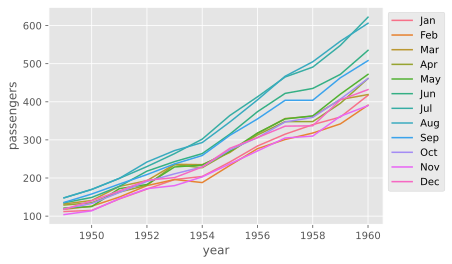

In [60]:
#hue옵션 사용하기
lineplot = sns.lineplot(data=flights, x='year',y='passengers', hue='month')
#범례(legend)위치 조절
plt.legend(bbox_to_anchor=(1,1),loc='best')

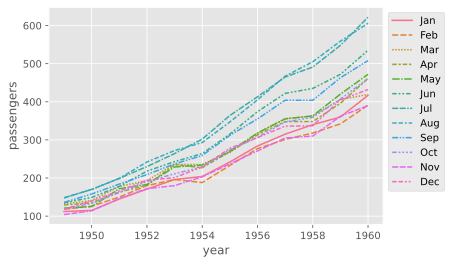

In [61]:
#hue옵션과 style옵션 함께 사용
lineplot = sns.lineplot(data=flights, x='year',y='passengers', hue='month', style='month')
#범례(legend)위치 조절
plt.legend(bbox_to_anchor=(1,1),loc='best')

####fmri 데이터

In [62]:
#데이터 로드하기
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [63]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [64]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [65]:
fmri['subject'].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [66]:
fmri['event'].unique()

array(['stim', 'cue'], dtype=object)

In [67]:
fmri['region'].unique()

array(['parietal', 'frontal'], dtype=object)

####그래프 그리기

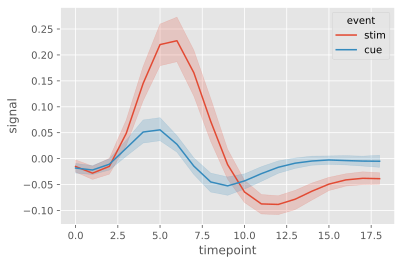

In [70]:
#hue옵션 사용하기
lineplot = sns.lineplot(data=fmri, x='timepoint',y='signal',hue='event')

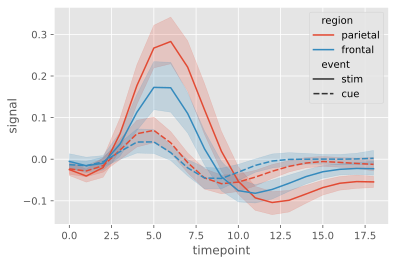

In [72]:
#style옵션 사용하기
lineplot = sns.lineplot(data=fmri, x='timepoint',y='signal',hue='region',style='event')

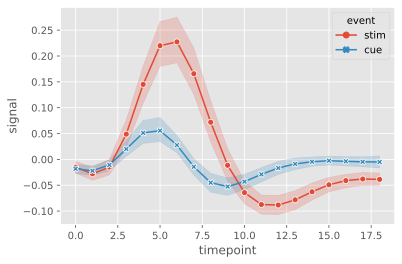

In [74]:
#markers 옵션 사용하기
#dashes = False 옵션은 선은 같은 종류로 만듬
lineplot = sns.lineplot(data=fmri, x='timepoint', y='signal',hue='event',style='event',
                        markers=True, dashes=False)

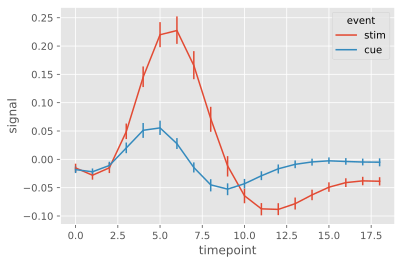

In [81]:
#ci옵션으로 신뢰구간을 설정하고 오차 구가 대신
#err_style='bars'로 오차 막대를 표시 

lineplot = sns.lineplot(data=fmri, x='timepoint', y='signal',hue='event',err_style='bars',ci=68)

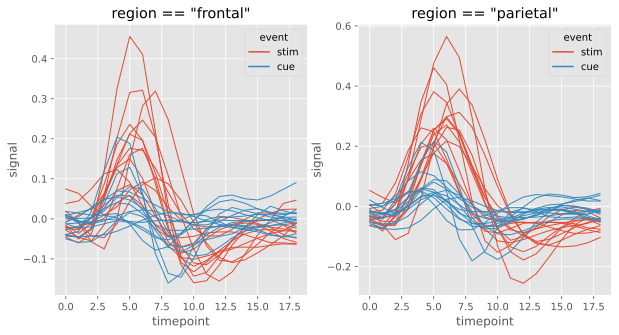

In [97]:
#units='subject'로 s0~s13까지 그래프를 그림
#lw옵션은 선의 두께를 설정
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.lineplot(data=fmri.query("region == 'frontal'"), x= 'timepoint',y='signal',hue='event', units='subject',estimator=None,lw=1, ax=ax[0])
ax[0].set_title('region == "frontal"')
sns.lineplot(data=fmri.query("region == 'parietal'"), x= 'timepoint',y='signal',hue='event', units='subject',estimator=None,lw=1, ax=ax[1])
ax[1].set_title('region == "parietal"')
plt.show()

####dots 데이터

In [100]:
#데이터 로드하기
dots = sns.load_dataset('dots')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [101]:
dots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB


In [102]:
dots.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


In [103]:
dots['align'].unique()

array(['dots', 'sacc'], dtype=object)

In [104]:
dots['choice'].unique()

array(['T1', 'T2'], dtype=object)

In [110]:
#seaborn API 예제에서 사용한 데이터와 같게 만들기
#dots = dots[dots['align'] == 'dots'].copy()
dots = dots.query('align == "dots"').copy()

####그래프 그리기

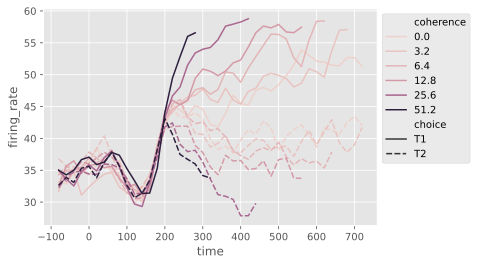

In [113]:
lineplot = sns.lineplot(data=dots, x='time', y='firing_rate',hue='coherence',style='choice')
plt.legend(bbox_to_anchor=(1,1))

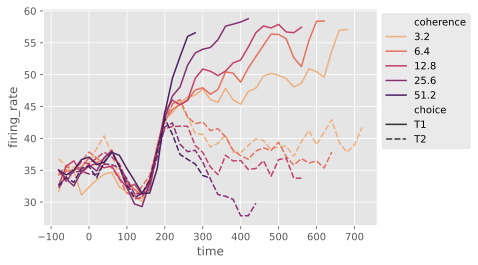

In [119]:
#palette 옵션 사용하기
lineplot = sns.lineplot(data=dots.query("coherence > 0"), x='time', y='firing_rate',hue='coherence',style='choice', palette='flare',hue_norm=mpl.colors.LogNorm())
plt.legend(bbox_to_anchor=(1,1))

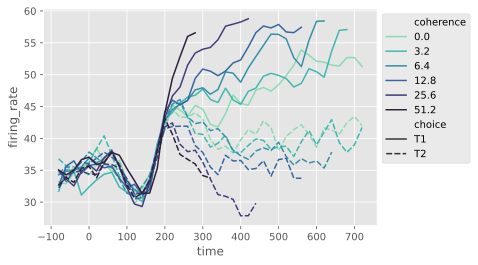

In [120]:
#palette를 따로 지정하여 사용
palette = sns.color_palette("mako_r", 6)
lineplot = sns.lineplot(data=dots, x='time', y='firing_rate',hue='coherence',style='choice', palette=palette)
plt.legend(bbox_to_anchor=(1,1))

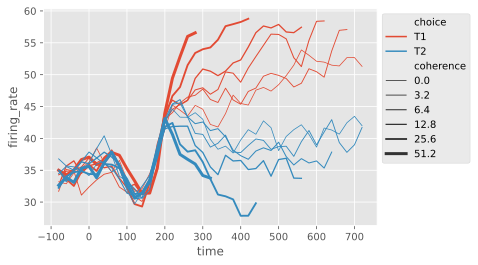

In [123]:
#size 옵션 사용하기
lineplot = sns.lineplot(data=dots, x='time', y='firing_rate',hue='choice',size='coherence',legend='full')
plt.legend(bbox_to_anchor=(1,1))

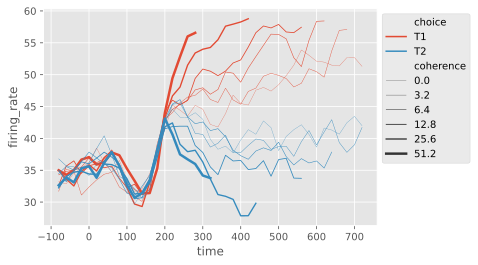

In [124]:
#sizes 옵션 사용하기
#size의 크기를 직접지정
lineplot = sns.lineplot(data=dots, x='time', y='firing_rate',hue='choice',size='coherence',sizes=(.25,2.5))
plt.legend(bbox_to_anchor=(1,1))